In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline
from bs4 import BeautifulSoup
import requests
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sb
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from pathlib import Path
import pickle

In [2]:
MODELS_DIR = Path("models/")
SKLEARN_MODEL_PATH = MODELS_DIR.joinpath("sklearn/web_scrapper.pk")


SKLEARN_MODEL_PATH.parent.mkdir(exist_ok=True, parents=True)


In [37]:
!pip install transformers[torch]

  Obtaining dependency information for transformers[torch] from https://files.pythonhosted.org/packages/98/46/f6a79f944d5c7763a9bc13b2aa6ac72daf43a6551f5fb03bccf0a9c2fec1/transformers-4.33.3-py3-none-any.whl.metadata
  Using cached transformers-4.33.3-py3-none-any.whl.metadata (119 kB)
  Obtaining dependency information for accelerate>=0.20.3 from https://files.pythonhosted.org/packages/d9/92/2d3aecf9f4a192968035880be3e2fc8b48d541c7128f7c936f430d6f96da/accelerate-0.23.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/258.1 kB ? eta -:--:--
   ---------------------------------------- 258.1/258.1 kB 8.0 MB/s eta 0:00:00
Using cached transformers-4.33.3-py3-none-any.whl (7.6 MB)


In [11]:
dataset=pd.read_csv('website_classification.csv')
dataset.head()


,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [12]:
website= dataset[['website_url','Category']]
website

,website_url,Category
0,https://www.booking.com/index.html?aid=1743217,Travel
1,https://travelsites.com/expedia/,Travel
2,https://travelsites.com/tripadvisor/,Travel
3,https://www.momondo.in/?ispredir=true,Travel
4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,Travel
...,...,...
1403,http://www.oldwomen.org/,Adult
1404,http://www.webcamslave.com,Adult
1405,http://www.buyeuroporn.com/,Adult
1406,http://www.analdreamhouse.com/30/03/agecheck/i...,Adult


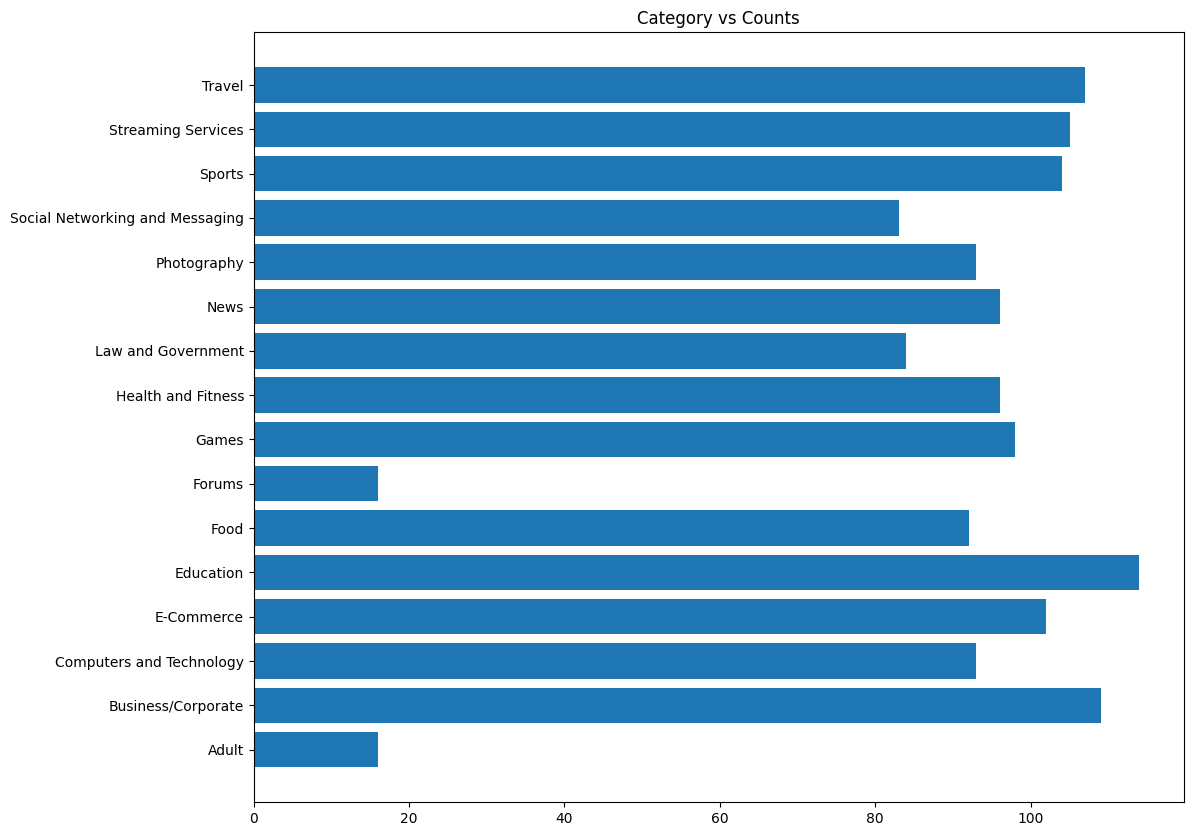

In [13]:
plt.figure(figsize=(12,10))
plt.title('Category vs Counts')
website_category= pd.DataFrame(website.groupby('Category').size(),columns=['Count'])
plt.barh(width=website_category['Count'],y=website_category.index)
plt.show()

In [14]:
dataset['Category'].value_counts()

Category
Education                          114
Business/Corporate                 109
Travel                             107
Streaming Services                 105
Sports                             104
E-Commerce                         102
Games                               98
News                                96
Health and Fitness                  96
Photography                         93
Computers and Technology            93
Food                                92
Law and Government                  84
Social Networking and Messaging     83
Forums                              16
Adult                               16
Name: count, dtype: int64

## SVC

In [15]:
X = dataset['cleaned_website_text']
y = dataset['Category']

In [16]:
labelEnc =  LabelEncoder()
labelEnc.fit(y)

LabelEncoder()

In [17]:
labelEnc.classes_
clases=labelEnc.classes_

In [18]:
y = labelEnc.transform(y)
y

array([15, 15, 15, ...,  0,  0,  0])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
type(X_train[0])

str

In [21]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

text_clf.fit(X_train, y_train)

c:\Users\AndresVJ\Desktop\proyecto final\backend\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [22]:
predictions = text_clf.predict(X_test)

In [23]:
print(confusion_matrix(y_test, predictions))

[[ 5  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0 35  1  3  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  1 22  1  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  1  0 32  0  0  0  1  0  0  0  0  0  0  2  0]
 [ 0  1  0  0 43  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  2  0  1  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0 30  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0 28  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 35  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  1 31  0  0  0  0]
 [ 0  0  1  0  1  1  0  0  0  0  0  1 23  0  1  1]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0 38  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0 25]]


In [24]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.88      0.88      0.88        40
           2       0.73      0.88      0.80        25
           3       0.89      0.89      0.89        36
           4       0.96      0.96      0.96        45
           5       0.94      0.97      0.95        30
           6       1.00      0.25      0.40         4
           7       0.94      0.91      0.92        33
           8       0.96      1.00      0.98        23
           9       1.00      0.97      0.98        29
          10       0.97      0.97      0.97        36
          11       0.97      0.94      0.95        33
          12       1.00      0.79      0.88        29
          13       0.95      0.97      0.96        39
          14       0.89      1.00      0.94        31
          15       0.93      0.96      0.94        26

    accuracy                           0.93       465
   macro avg       0.94   

## Naive Bayes

In [17]:
from sklearn import feature_extraction
from sklearn.metrics import confusion_matrix
from sklearn import model_selection as ms
from sklearn import naive_bayes
from sklearn import preprocessing

In [18]:
counts = feature_extraction.text.CountVectorizer()
X = counts.fit_transform(dataset['cleaned_website_text'].values)
X.shape

(1408, 60031)

In [20]:
y = dataset['Category'].values
y

array(['Travel', 'Travel', 'Travel', ..., 'Adult', 'Adult', 'Adult'],
      dtype=object)

In [21]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model_naive = naive_bayes.MultinomialNB()
model_naive.fit(X_train, y_train)

MultinomialNB()

In [23]:
model_naive.score(X_train, y_train)

0.9822380106571936

In [24]:
model_naive.score(X_test, y_test)

0.875886524822695

In [25]:
confusion_matrix(y_test, model_naive.predict(X_test))

array([[ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  1,  1,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0,  2, 14,  0,  1,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  4,  0,  0, 22,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 14,  0,  0,  0,  0,  1,  0,  0,  1,  0,  1],
       [ 0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  0,  0, 18,  0,  0,  1,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 21,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 17,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2, 18,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  1, 14,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,

In [27]:
predictions = model_naive.predict(X_test)
print(classification_report(y_test, predictions))

                                 precision    recall  f1-score   support

                          Adult       1.00      1.00      1.00         4
             Business/Corporate       0.65      0.76      0.70        17
       Computers and Technology       0.78      0.74      0.76        19
                     E-Commerce       0.92      1.00      0.96        22
                      Education       0.92      0.81      0.86        27
                           Food       0.93      0.82      0.87        17
                         Forums       0.00      0.00      0.00         2
                          Games       0.95      0.82      0.88        22
             Health and Fitness       0.93      1.00      0.96        13
             Law and Government       1.00      0.91      0.95        23
                           News       0.61      0.94      0.74        18
                    Photography       0.95      0.90      0.92        20
Social Networking and Messaging       1.00      0.

c:\Users\AndresVJ\Desktop\proyecto final\backend\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AndresVJ\Desktop\proyecto final\backend\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AndresVJ\Desktop\proyecto final\backend\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [82]:
predictions = text_clf.predict([texto])

In [83]:
print(predictions)

[15]


In [8]:
text_clf()

NameError: name 'text_clf' is not defined

In [25]:
pickle.dump(
    text_clf, open(SKLEARN_MODEL_PATH, "wb")
)  # export the model to a file so we can use it later


# WeB Scrapping

In [41]:
summarizer = pipeline("summarization",framework='tf')

No model was supplied, defaulted to t5-small and revision d769bba (https://huggingface.co/t5-small).
Using a pipeline without specifying a model name and revision in production is not recommended.


All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


In [185]:
URL = "https://spartangeek.com/blog/cu%C3%A1nto-cuesta-una-pc-gamer-en-m%C3%A9xico"

In [186]:
URL = "https://spartangeek.com/blog/cu%C3%A1nto-cuesta-una-pc-gamer-en-m%C3%A9xico"


In [187]:
r.text

'<!DOCTYPE html>\n<html lang="es">\n<head>\n\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n    new Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n    j=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n    \'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n    })(window,document,\'script\',\'dataLayer\',\'GTM-TTSXPGS\');</script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=Edge">\n<meta property="og:type" content="article">\n<meta property="og:title" content="¿Cuánto cuesta una PC gamer en México? (Actualizado 2023) | Spartan Geek">\n<meta property="og:url" content="https://spartangeek.com/blog/cuánto-cuesta-una-pc-gamer-en-méxico">\n<meta property="og:image" content=" //assets.spartangeek.com/cc/pc-gamer_200117_155255.jpg ">\n<meta property="article:author" content="Spartan Geek">\n<meta content="Cuánto vale una PC gamer: cuánto cuesta armar una PC

In [188]:
soup = BeautifulSoup(r.text, 'html.parser')
results = soup.find_all(['p','h1','h2'])
text = [result.text for result in results]
ARTICLE = ' '.join(text)

In [189]:
print(ARTICLE)

¿Cuánto cuesta una PC gamer en México? (Actualizado 2023) A diferencia de las consolas, una PC gamer puede llegar a ser realmente costosa. Pero cuánto cuesta una PC gamer en México depende de la potencia del hardware que utilice. Una computadora gamer barata puede satisfacer las necesidades más básicas, pero un gamer dedicado necesitará un equipo más potente. ¿Cuánto cuesta armar una PC gamer? Depende del tipo de computadora gamer que quieras. Una PC gamer armada puede costar $12,000 pesos, si usas hardware de gama baja, o más de $100,000 pesos si usas lo mejor que el mercado puede ofrecer en componentes. ¿Cuánto cuesta una PC gamer barata? Una computadora para videojuegos barata vale entre $12,000 pesos y $21,000 pesos. Entre las pc gamers más baratas encontramos procesadores Intel i3 o Ryzen 3 y gráficos Radeon Vega 11 y RX 550. Por ejemplo, la PC gamer Agis R5 ofrece CPU Ryzen 5 3400G, gráficos Radeon Vega 11, 8 GB de RAM y 1 TB HDD por $13,390 pesos. Mientras que con la Gladius 50i

In [190]:
max_chunk = 500

In [191]:
ARTICLE = ARTICLE.replace('.', '.<eos>')
ARTICLE = ARTICLE.replace('?', '?<eos>')
ARTICLE = ARTICLE.replace('!', '!<eos>')

In [192]:
sentences = ARTICLE.split('<eos>')
current_chunk = 0 
chunks = []
for sentence in sentences:
    if len(chunks) == current_chunk + 1: 
        if len(chunks[current_chunk]) + len(sentence.split(' ')) <= max_chunk:
            chunks[current_chunk].extend(sentence.split(' '))
        else:
            current_chunk += 1
            chunks.append(sentence.split(' '))
    else:
        print(current_chunk)
        chunks.append(sentence.split(' '))

for chunk_id in range(len(chunks)):
    chunks[chunk_id] = ' '.join(chunks[chunk_id])

0


In [193]:
len(chunks)

2

In [194]:
res = summarizer(chunks, max_length=100, min_length=30, do_sample=False)

In [195]:
res[0]

{'summary_text': 'una PC gamer en México depende de la potencia del hardware que utilice . una computadora gamer barata puede satisfacer las necesidades más básicas, pero un gamer dedicado necesitará un equipo más potente .'}

In [196]:
texto=' '.join([summ['summary_text'] for summ in res])
texto

'una PC gamer en México depende de la potencia del hardware que utilice . una computadora gamer barata puede satisfacer las necesidades más básicas, pero un gamer dedicado necesitará un equipo más potente . si buscas más potencia de procesamiento, la Stelios 70z viene con CPU Ryzen 7 3700X y la misma RTX 3070 . adelante encuentras PCs con procesadores Ryzen 9, gráficos 3090 y memoria RAM de 64 GB .'

In [197]:
type(texto)

str

In [179]:
texto[0:400]

'data science es una disciplina cientfica centrada en el análisis de grandes fuentes de datos para extraer información, comprender la realidad y descubrir patrones con los que tomar decisiones . data science no existira de no se encargan de ello son . alguna vez te ha llamado tu compaa telefónica para hacerte una serie de hechos . de este modo, el nivel más bajo aprende algo simple, convirtiéndola '

In [198]:
from deep_translator import GoogleTranslator
translated = GoogleTranslator(source='auto', target='en').translate(texto)
translated

"A gaming PC in Mexico depends on the power of the hardware it uses. A cheap gaming computer can satisfy the most basic needs, but a dedicated gamer will need a more powerful computer. If you're looking for more processing power, the Stelios 70z comes with Ryzen 7 3700X CPU and the same RTX 3070. Below you will find PCs with Ryzen 9 processors, 3090 graphics and 64 GB RAM."

In [203]:
predictions = text_clf.predict([translated])
print(predictions)

[2]


In [155]:
clases[predictions]

array(['Sports'], dtype=object)

In [156]:
clases

array(['Adult', 'Business/Corporate', 'Computers and Technology',
       'E-Commerce', 'Education', 'Food', 'Forums', 'Games',
       'Health and Fitness', 'Law and Government', 'News', 'Photography',
       'Social Networking and Messaging', 'Sports', 'Streaming Services',
       'Travel'], dtype=object)